<a href="https://colab.research.google.com/github/johnatanDM/bootcamp-datascience-alura/blob/main/M%C3%B3dulo%201%20-%20PYTHON%20E%20PANDAS%20PARA%20AN%C3%81LISE%20DE%20DADOS%20REAIS/Bootcamp_Data_Science_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos fazer uma análise nos dados do DATASUS, trabalhando com os dados financeiros do SUS.

Primeiro vamos importas as bibliotecas que nos ajudarão na nossa análise:

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


Importando os dados no github da Alura, preparado para o bootcamp:

In [13]:
dados = pd.read_csv("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/A151346189_28_143_208.csv", 
                    delimiter=';', 
                    encoding = "ISO-8859-1",
                    skiprows=3,
                    skipfooter=12,
                    decimal=",",
                    thousands=".", 
                    engine='python')
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,3.068430e+06,2.825839e+06,2.931174e+06,2.885269e+06,2.860104e+06,3.684945e+06,3.607290e+06,3.774357e+06,3.706712e+06,3.763188e+06,3.533626e+06,3605007.43,3.907033e+06,3.939821e+06,3.901084e+06,3.684407e+06,3.623016e+06,3.890462e+06,4.193534e+06,4.534401e+06,4.451208e+06,4.874593e+06,4.460802e+06,5.067886e+06,4.511093e+06,4.394680e+06,4.098742e+06,4.411499e+06,3.868618e+06,4.298703e+06,...,7.948292e+06,8.438077e+06,7.656645e+06,8.047743e+06,8.657206e+06,8.150894e+06,7.507845e+06,7.998346e+06,8.893684e+06,8.867793e+06,8.871408e+06,8.501602e+06,8.315108e+06,8.525500e+06,9.177611e+06,7.368996e+06,8.835095e+06,8.328187e+06,8.408513e+06,9.351706e+06,8.143008e+06,8.949742e+06,9.630553e+06,9.581970e+06,7.891114e+06,9.792371e+06,9.170788e+06,8.816847e+06,1.002455e+07,9.675424e+06,8.085026e+06,9.221412e+06,7.493311e+06,8.092260e+06,7.273844e+06,7.652120e+06,8.725531e+06,1.115211e+07,10285455.78,9.291297e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,1.923887e+06,1.756987e+06,2.235640e+06,2.497116e+06,2.253558e+06,2.122674e+06,2.834318e+06,2.722066e+06,2.432832e+06,2.630191e+06,2.307579e+06,-,2.826477e+06,2.170791e+06,2.541526e+06,2.491042e+06,1.954474e+06,2.389996e+06,2.654879e+06,2.844085e+06,2.336207e+06,2.125143e+06,2.430294e+06,2.377738e+06,2.184747e+06,2.468453e+06,2.516285e+06,3.051370e+06,2.629104e+06,2.485452e+06,...,2.397513e+06,2.348760e+06,3.139155e+06,2.765063e+06,4.540085e+06,4.120229e+06,2.610455e+06,3.576595e+06,2.444567e+06,2.602434e+06,3.064163e+06,2.276237e+06,3.239474e+06,3.126430e+06,2.998866e+06,2.619710e+06,3.018049e+06,3.342614e+06,2.123426e+06,2.664655e+06,1.906430e+06,3.096440e+06,2.411628e+06,2.840631e+06,3.260154e+06,3.250723e+06,3.204999e+06,3.052746e+06,3.124802e+06,3.021522e+06,2.874871e+06,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,-,4.206680e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,8.618319e+06,6.555549e+06,7.777646e+06,7.403068e+06,6.683347e+06,9.927781e+06,8.844511e+06,9.079036e+06,8.832895e+06,9.373396e+06,9.578326e+06,9730634.16,9.179253e+06,8.314649e+06,9.050439e+06,9.419461e+06,8.680179e+06,9.168055e+06,9.897902e+06,9.651362e+06,1.085460e+07,1.041712e+07,8.718347e+06,8.221592e+06,9.613977e+06,9.927574e+06,9.470661e+06,9.736751e+06,8.745260e+06,9.380112e+06,...,1.278964e+07,1.437699e+07,1.424007e+07,1.359465e+07,1.458429e+07,1.315872e+07,1.316966e+07,1.357226e+07,1.308308e+07,1.432231e+07,1.464334e+07,1.463221e+07,1.450052e+07,1.484053e+07,1.442762e+07,1.581896e+07,1.635846e+07,1.539116e+07,1.415436e+07,1.679140e+07,1.436999e+07,1.633902e+07,1.562291e+07,1.648317e+07,1.542224e+07,1.596199e+07,1.578790e+07,1.651544e+07,1.573120e+07,1.574461e+07,1.434655e+07,1.601846e+07,1.491375e+07,1.506830e+07,1.350958e+07,1.965859e+07,2.089754e+07,1.934645e+07,14726443.67,1.771655e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+06,1.056219e+06,1.244339e+06,1.08

In [18]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

In [19]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,101374341.51,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,19241624.02,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,17790649.87,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.4

Média de gastos das unidades federativas em cada mês.

In [20]:
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Abr    4.101366e+07
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
Total       5.993732e+09
Length: 151, dtype: float64

Corrigindo a forma de apresentação dos números no pandas

In [21]:
pd.options.display.float_format = "{:.2f}".format

In [22]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

A média de gastos no mês de Agosto de 2008

In [24]:
dados["2008/Ago"].mean()

27800320.306666665

Vamos plotar um gráfico para visualizar os gastos por unidade federativa no mês de Agosto de 2008

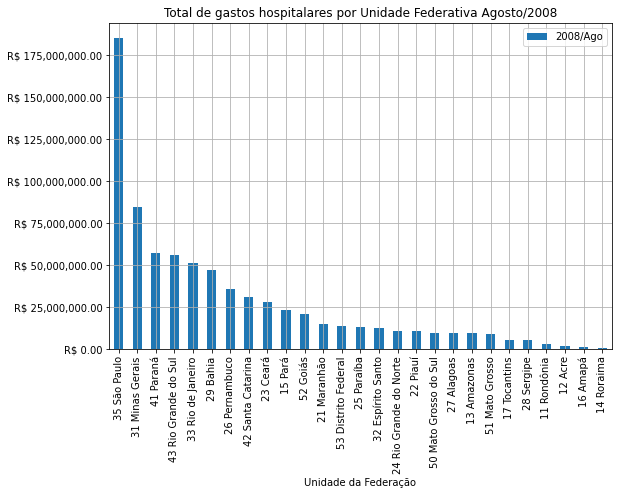

In [53]:
ax = dados.sort_values(by='2008/Ago', ascending=False).plot(x='Unidade da Federação',
                                                            y='2008/Ago', 
                                                            kind='bar', 
                                                            figsize=(9,6), 
                                                            grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares por Unidade Federativa Agosto/2008')
plt.show()

In [45]:
dados['2020/Ago'].replace('-', np.nan, inplace=True)
dados['2020/Ago'] = dados['2020/Ago'].astype('float64')

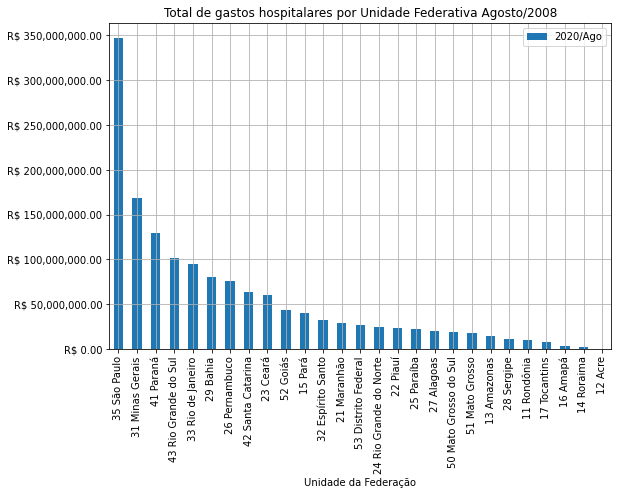

In [55]:
ax = dados.sort_values(by='2020/Ago', ascending=False).plot(x='Unidade da Federação',
                                                            y='2020/Ago', 
                                                            kind='bar', 
                                                            figsize=(9,6), 
                                                            grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares por Unidade Federativa Agosto/2008')
plt.show()